1. First, install FRED in your corresponding conda environment (in the terminal): 

- pip install fredapi

2. Next, visit FRED API portal and register for a free API key, allowing you to query the FRED database programmatically

3. Once you have the api key, setup by importing all the necessary libraries (pandas, numpy, matplotlib, plotly, seaborn), inserting your api key and assigning it to the fred variable:

- from fredapi import Fred
- fred = Fred(api_key='your_api_key)

In [ ]:
#importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns 
from plotly.subplots import make_subplots

In [11]:
#import fredapi key
from fredapi import Fred

from dotenv import load_dotenv
import os

#Load variables from .env
load_dotenv() 
fred_key = os.getenv("FRED_API_KEY")

#create fred object
fred = Fred(api_key=fred_key)

## Search for and visualise NFP Data

In [12]:
fred.search('Total Nonfarm Payroll Employment', order_by='popularity').head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
PAYEMS,PAYEMS,2024-11-18,2024-11-18,"All Employees, Total Nonfarm",1939-01-01,2024-10-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2024-11-01 07:48:01-05:00,83,"All Employees: Total Nonfarm, commonly known a..."
ADPWNUSNERSA,ADPWNUSNERSA,2024-11-18,2024-11-18,Total Nonfarm Private Payroll Employment,2010-01-02,2024-09-14,Weekly,W,Persons,Persons,Seasonally Adjusted,SA,2024-10-30 07:26:02-05:00,56,The January 2023 report presents the scheduled...
PAYNSA,PAYNSA,2024-11-18,2024-11-18,"All Employees, Total Nonfarm",1939-01-01,2024-10-01,Monthly,M,Thousands of Persons,Thous. of Persons,Not Seasonally Adjusted,NSA,2024-11-01 07:48:08-05:00,47,"All Employees: Total Nonfarm, commonly known a..."
NPPTTL,NPPTTL,2024-11-18,2024-11-18,Total Nonfarm Private Payroll Employment (DISC...,2002-04-01,2022-05-01,Monthly,M,Thousands,Thous.,Seasonally Adjusted,SA,2022-06-02 07:26:02-05:00,42,"Copyright, 2016, Automatic Data Processing, In..."
ADPMNUSNERSA,ADPMNUSNERSA,2024-11-18,2024-11-18,Total Nonfarm Private Payroll Employment,2010-01-01,2024-10-01,Monthly,M,Persons,Persons,Seasonally Adjusted,SA,2024-10-30 07:26:02-05:00,35,The January 2023 report presents the scheduled...


In [13]:
NFP = fred.get_series(series_id='PAYEMS', observation_start='2019-01-01', observation_end='2024-10-01')
NFP

2019-01-01    150062.0
2019-02-01    150067.0
2019-03-01    150294.0
2019-04-01    150602.0
2019-05-01    150640.0
                ...   
2024-06-01    158548.0
2024-07-01    158692.0
2024-08-01    158770.0
2024-09-01    158993.0
2024-10-01    159005.0
Length: 70, dtype: float64

In [14]:
NFP.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 70 entries, 2019-01-01 to 2024-10-01
Series name: None
Non-Null Count  Dtype  
--------------  -----  
70 non-null     float64
dtypes: float64(1)
memory usage: 1.1 KB


In [15]:
fig = px.line(NFP)
fig.update_layout(showlegend=False)
fig.update_layout(
    title='US Nonfarm Payroll Growth: Pre- and Post-Pandemic',
    xaxis_title='',
    yaxis_title='Thousands of People'
)

fig.update_layout(
    yaxis_tickformat=','
)
# formatting y-axis
fig.update_layout(width=950, height=500)
fig.update_xaxes(
    dtick="M12",  # Interval of 12 months = 1 year
    tickformat="%Y"  # Format the ticks as years (e.g., 2005, 2006, etc.
)
fig.show()

![NFP Overview](Images/nfp_overview.png)

## Visualising NFP data for major job sectors over the last 20 years

In [202]:
US_CON = fred.get_series('USCONS')

In [203]:
US_CON

1939-01-01    1139.0
1939-02-01    1162.0
1939-03-01    1225.0
1939-04-01    1249.0
1939-05-01    1262.0
               ...  
2024-06-01    8233.0
2024-07-01    8247.0
2024-08-01    8275.0
2024-09-01    8302.0
2024-10-01    8310.0
Length: 1030, dtype: float64

### Loop Logic to get_series fo each label:

sector_id = ['USCONS', 'USEHS']
variables = {} #dictionary

for x in sector_id:
    variables[f'{x}_series'] = fred.get_series(x)

In [10]:
sector_id = ['USCONS', 'USEHS', 'USFIRE', 'USINFO', 'USLAH', 'MANEMP', 'USPBS', 'USTPU']
variables = {} #dictionary

for x in sector_id:
    variables[f'{x}_series'] = fred.get_series(x, observation_start='2019-01-01', observation_end='2024-10-01')

In [11]:
print(variables['USCONS_series'].head()) 

2019-01-01    7425.0
2019-02-01    7395.0
2019-03-01    7425.0
2019-04-01    7468.0
2019-05-01    7478.0
dtype: float64


In [12]:
sector_keys = list(variables.keys())

In [13]:
sector_keys

['USCONS_series',
 'USEHS_series',
 'USFIRE_series',
 'USINFO_series',
 'USLAH_series',
 'MANEMP_series',
 'USPBS_series',
 'USTPU_series']

In [14]:
df = pd.DataFrame()

for key in sector_keys:
    series_data = variables[key]
    df[key]= series_data

In [15]:
df

,USCONS_series,USEHS_series,USFIRE_series,USINFO_series,USLAH_series,MANEMP_series,USPBS_series,USTPU_series
2019-01-01,7425.0,23903.0,8671.0,2842.0,16488.0,12828.0,21161.0,27635.0
2019-02-01,7395.0,23929.0,8683.0,2843.0,16494.0,12818.0,21191.0,27591.0
2019-03-01,7425.0,23990.0,8705.0,2849.0,16504.0,12825.0,21220.0,27592.0
2019-04-01,7468.0,24062.0,8723.0,2846.0,16527.0,12822.0,21278.0,27628.0
2019-05-01,7478.0,24098.0,8736.0,2858.0,16507.0,12818.0,21325.0,27638.0
...,...,...,...,...,...,...,...,...
2024-06-01,8233.0,26336.0,9248.0,3015.0,16906.0,12945.0,22980.0,29036.0
2024-07-01,8247.0,26403.0,9244.0,2999.0,16944.0,12951.0,22976.0,29036.0
2024-08-01,8275.0,26470.0,9251.0,2991.0,16953.0,12925.0,22929.0,29039.0
2024-09-01,8302.0,26565.0,9255.0,2994.0,16993.0,12919.0,22920.0,29066.0


In [16]:
label_names = {
    'USCONS_series': 'Construction', 
    'USEHS_series': 'Education & Health',
    'USFIRE_series': 'Financial Activities', 
    'USINFO_series': 'Information',
    'USLAH_series': 'Leisure & Hospitality',
    'MANEMP_series': 'Manufacturing',
    'USPBS_series': 'Professional & Business Services',
    'USTPU_series': 'Trade, Transport & Utilities'
    
}

In [211]:
for i, k in enumerate(label_names):
    print(i, k)

0 USCONS_series
1 USEHS_series
2 USFIRE_series
3 USINFO_series
4 USLAH_series
5 MANEMP_series
6 USPBS_series
7 USTPU_series


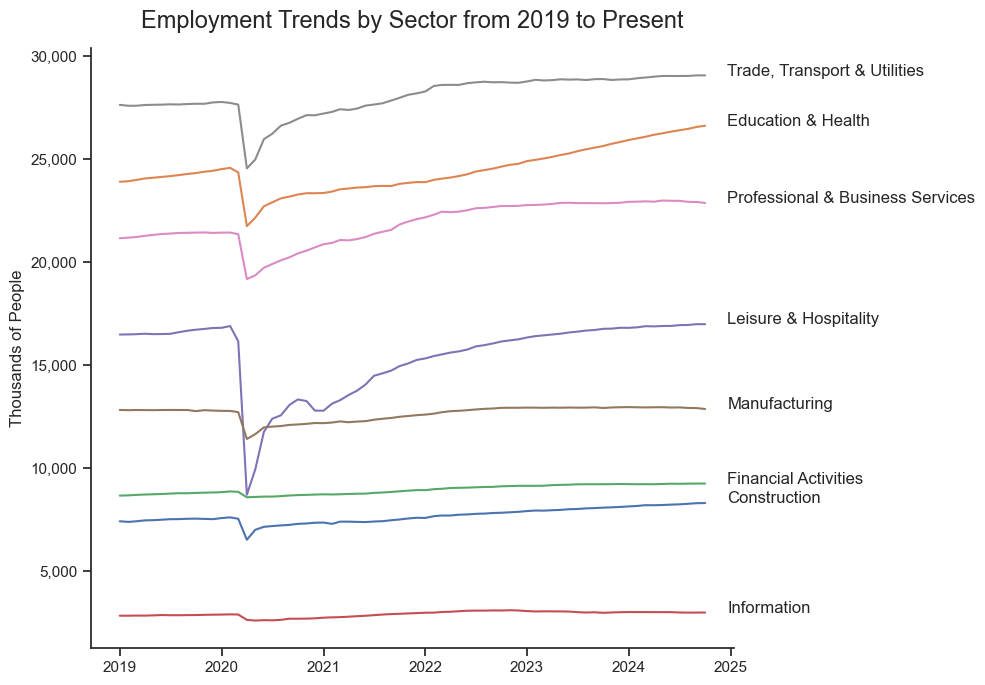

In [21]:
plt.figure(figsize=(10, 7))

sns.lineplot(data=df, dashes=False)
sns.set_theme(style='ticks')
sns.despine()

plt.title('Employment Trends by Sector from 2019 to Present', fontsize=17, y=1.02)
plt.ylabel('Thousands of People')
plt.legend().set_visible(False)

ax= plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'{int(y):,}'))


# years = df.index.year.unique()  # Get unique years from the datetime index
# ax.set_xticks([df.index[df.index.year == year][0] for year in years])  # Set ticks to first date of each year
# ax.set_xticklabels(years, rotation=45)


for i, k in enumerate(label_names):  # Iterate through each column
    y_val = df.iloc[-1, i]
    x_pos = df.index[-1] 
    x_pos_adjusted = x_pos + pd.Timedelta(days=80)  # Adjust the position by 5 days

    plt.text(x_pos_adjusted, y_val, label_names[k], fontsize=12)


plt.tight_layout()

## Horizontal bar chart to illustrate the net change in employment over the 3 months, 6 months and 1 year for each sector

To do this, I need to filter data so i get specific time-series data for the following dates:
- 2023-10-01 (1 Year Change)
- 2024-04-01 (6 month change)
- 2024-07-01 (3 month change)

In [164]:
dates = ['2023-10-01', '2024-04-01', '2024-07-01', '2024-10-01']

filtered_df = df.loc[dates]
filtered_df

,USCONS_series,USEHS_series,USFIRE_series,USINFO_series,USLAH_series,MANEMP_series,USPBS_series,USTPU_series
2023-10-01,8087.0,25637.0,9223.0,2982.0,16765.0,12923.0,22859.0,28888.0
2024-04-01,8202.0,26185.0,9223.0,3016.0,16884.0,12958.0,22936.0,29003.0
2024-07-01,8247.0,26403.0,9244.0,2999.0,16944.0,12951.0,22976.0,29036.0
2024-10-01,8310.0,26622.0,9255.0,2997.0,16989.0,12873.0,22873.0,29065.0


In [165]:
filtered_df.loc['1-Year Net Change'] = filtered_df.loc[pd.Timestamp('2024-10-01')] - filtered_df.loc[pd.Timestamp('2023-10-01')]
filtered_df.loc['6-Month Net Change'] = filtered_df.loc[pd.Timestamp('2024-10-01')] - filtered_df.loc[pd.Timestamp('2024-04-01')]
filtered_df.loc['3-Month Net Change'] = filtered_df.loc[pd.Timestamp('2024-10-01')] - filtered_df.loc[pd.Timestamp('2024-07-01')]


filtered_df

,USCONS_series,USEHS_series,USFIRE_series,USINFO_series,USLAH_series,MANEMP_series,USPBS_series,USTPU_series
2023-10-01 00:00:00,8087.0,25637.0,9223.0,2982.0,16765.0,12923.0,22859.0,28888.0
2024-04-01 00:00:00,8202.0,26185.0,9223.0,3016.0,16884.0,12958.0,22936.0,29003.0
2024-07-01 00:00:00,8247.0,26403.0,9244.0,2999.0,16944.0,12951.0,22976.0,29036.0
2024-10-01 00:00:00,8310.0,26622.0,9255.0,2997.0,16989.0,12873.0,22873.0,29065.0
1-Year Net Change,223.0,985.0,32.0,15.0,224.0,-50.0,14.0,177.0
6-Month Net Change,108.0,437.0,32.0,-19.0,105.0,-85.0,-63.0,62.0
3-Month Net Change,63.0,219.0,11.0,-2.0,45.0,-78.0,-103.0,29.0


In [166]:
net_change = filtered_df.loc[['1-Year Net Change', '6-Month Net Change', '3-Month Net Change']]
net_change

,USCONS_series,USEHS_series,USFIRE_series,USINFO_series,USLAH_series,MANEMP_series,USPBS_series,USTPU_series
1-Year Net Change,223.0,985.0,32.0,15.0,224.0,-50.0,14.0,177.0
6-Month Net Change,108.0,437.0,32.0,-19.0,105.0,-85.0,-63.0,62.0
3-Month Net Change,63.0,219.0,11.0,-2.0,45.0,-78.0,-103.0,29.0


In [167]:
for i, k in enumerate(label_names):
    net_change = net_change.rename(columns={k:label_names[k]})

net_change

,Construction,Education & Health,Financial Activities,Information,Leisure & Hospitality,Manufacturing,Professional & Business Services,"Trade, Transport & Utilities"
1-Year Net Change,223.0,985.0,32.0,15.0,224.0,-50.0,14.0,177.0
6-Month Net Change,108.0,437.0,32.0,-19.0,105.0,-85.0,-63.0,62.0
3-Month Net Change,63.0,219.0,11.0,-2.0,45.0,-78.0,-103.0,29.0


In [196]:
fig = px.bar(data_frame=net_change.loc['1-Year Net Change'], orientation='h', color=net_change.columns)


fig.update_layout(showlegend=False)
fig.update_layout(width=900, height=500)
fig.update_layout(
    title= '1-Year Net Change in Employment in the US',
    xaxis_title='Difference in thousands',
    yaxis_title=''
)
fig.show()

![1-Year Net Chnage in Employment](Images/1-year_net_change.png)

In [195]:
fig = px.bar(data_frame=net_change.loc['6-Month Net Change'], orientation='h', color=net_change.columns)


fig.update_layout(showlegend=False)
fig.update_layout(width=900, height=500)
fig.update_layout(
    title= '6-Month Net Change in Employment in the US',
    xaxis_title='Difference in thousands',
    yaxis_title=''
)
fig.show()

![6-Month Net Chnage in Employment](Images/6_month_net_change.png)

In [197]:
fig = px.bar(data_frame=net_change.loc['3-Month Net Change'], orientation='h', color=net_change.columns)


fig.update_layout(showlegend=False)
fig.update_layout(width=900, height=500)
fig.update_layout(
    title= '3-Month Net Change in Employment in the US',
    xaxis_title='Difference in thousands',
    yaxis_title=''
)

fig.update_xaxes(dtick=50) 

fig.show()

![3-Month Net Chnage in Employment](Images/3_month_net_change.png)